# import packages

In [87]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.applications import resnet50
import tensorflow as tf
from PIL import Image, ImageEnhance

In [20]:
from skimage.color import rgb2gray
import pandas as pd
import numpy as np
import os

## Objects

In [98]:
img_data_gen_obj = ImageDataGenerator()

In [4]:
# constants
root_path = "./data/faces/img_align_celeba/img_align_celeba/"
image_size_x = 250
image_size_y = 250

In [5]:
# paths
path_bbox_caleba = "./data/faces/list_bbox_celeba.csv"
bbox_metadata = pd.read_csv(path_bbox_caleba, engine="python", )
data = bbox_metadata.head()
data

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


## Class for building methods pipeline.

In [16]:
# class image for data data standardization
# - data augmentation.
# - data standardization.
class DataStandardoization():
    def __init__(self, image) -> None:
        self.image = image
        
    def load_image(self, image_id):
        '''load an image from file. receive the image path.'''
        path = os.path.join(root_path, image_id)
        return load_img(path)
    
    def resize_image(self, target_size):
        '''receives a tuple of image size e.g (200, 200)'''
        # self.image = self.image.resize(target_size)
        return self.image.resize(target_size)
        
    def image_to_array(self,):
        '''convert an image to array.'''
        return img_to_array(self.image)
    
    def resize_image_in_batch(self, images):
        '''resize a lot of images in batches'''
        t_size = (200, 200)
        b_size = 3
        result_images = []
        for i in range(0, len(images), b_size):
            batch = images[i:i+b_size]
            resized_batch = [img.resize(t_size) for img in batch]
            result_images.extend(resized_batch)
        return result_images
    
    def reshape_image(self, image, num_samples):
        '''receives an image and number sample in DS. reshape the image'''
        return image.reshape((num_samples,)+image.shape)

    def filter_corrupted_image(self, root_path, image_path):
        '''filter corrupted images. return true or false''' 
        res = None
        try:
            with open(os.path.join(root_path,image_path), 'rb') as obj:
                res =  tf.compat.as_bytes("JFIF") in obj.peek(20)
                return res
        except IOError as ioe:
            print(ioe)
            return res

    def normalised_pixel_values(self, image, value=250.0 ):
        '''normalise pixels values'''
        return image.astype(np.float32) / value
    
    
    def convert_image_grey_scale(self, image):
        '''receive an image and convert it to grey scale.'''
        return rgb2gray(image)
    
    def convert_image_grey_scale_array(self, image_array):
        '''receive an image array.
        normalise it values, before converting to grey scale.'''
        return rgb2gray( self.normalised_pixel_values(image_array))
    
    def enhance_image_contrast(self, image, factor = 1.5):
        '''enhance an images contrast. image must not be an array.'''
        # value of > 1, means increase contrast. 
        # value < 1 decrease contrast. value 1, dont change contrast.
        return ImageEnhance.Contrast(image).enhance(factor)
    
    def norm_mean_substraction(self, image):
        '''apply means substraction on the image, image must be in shape of, bath, h, w, channels'''
        return preprocess_input(image)
    
    def save_image(sefl, image:Image):
        '''save an image.'''
        # image.save()
        
    def norm_z_score(self, image_array):
        '''perform z score on the image array'''
        return image_array / np.std(image_array) 
    
        
    def class_pipeline(self,):
        '''pipe methods for image preprocessing.'''
        pass
    

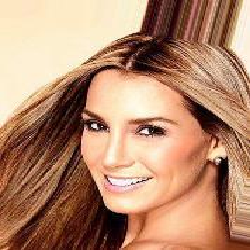

In [21]:
# load an image
image_path = data.iloc[0].image_id
image = load_img(f"{root_path}/{image_path}", target_size=(image_size_y, image_size_x))
img_arr = img_to_array(image)
# image = image.resize((200, 200))
# img_arr.shape
# img_arr.reshape()
image

In [107]:
# img_data_gen_obj.flow_from_directory("./data/faces/img_align_celeba/img_align_celeba/")
# print(img_arr)
std = np.std(image)
i = img_arr / std
print( i )

[[[-19.902605 -18.89002  -16.957148]
  [-19.902605 -18.89002  -16.957148]
  [-19.902605 -18.89002  -16.957148]
  ...
  [-19.87776  -18.815489 -16.596909]
  [-19.87776  -18.815489 -16.596909]
  [-19.890182 -18.803066 -16.609331]]

 [[-19.902605 -18.89002  -16.957148]
  [-19.902605 -18.89002  -16.957148]
  [-19.902605 -18.89002  -16.957148]
  ...
  [-19.87776  -18.815489 -16.596909]
  [-19.87776  -18.815489 -16.596909]
  [-19.890182 -18.803066 -16.609331]]

 [[-19.902605 -18.89002  -16.957148]
  [-19.902605 -18.89002  -16.957148]
  [-19.902605 -18.89002  -16.957148]
  ...
  [-19.87776  -18.803066 -16.584488]
  [-19.87776  -18.803066 -16.584488]
  [-19.87776  -18.790646 -16.596909]]

 ...

 [[-21.306297 -20.840284 -19.044052]
  [-21.616848 -21.150835 -19.354603]
  [-21.616848 -21.150835 -19.354603]
  ...
  [-21.517471 -21.06388  -18.994364]
  [-21.517471 -21.06388  -18.994364]
  [-21.529894 -21.06388  -18.994364]]

 [[-21.430517 -20.989347 -19.180695]
  [-21.33114  -20.889973 -19.081318]
